In [1]:
%run PolyPy_load_data.ipynb
%run PolyPy_load_torch_v2.ipynb
print('\nPolyPy loaded')

database imported:	CROW Polymer Database
PyTorch implemented:	Feed-Forward Neural Network (FFNN)

PolyPy loaded


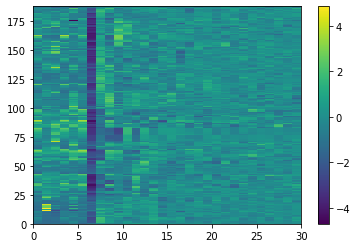

In [2]:
X = np.hstack([crow_props_zScore, partial_svd(crow_fp_128, 24)])
X_train, y_train, X_test, y_test = train_test_split(X, crow_Tg_zScore)
plt.pcolormesh(X_train)
plt.colorbar()

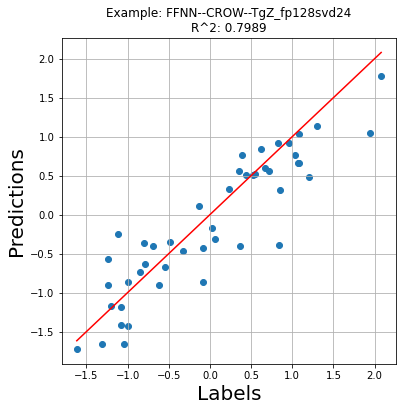

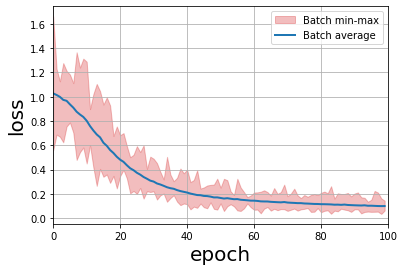

In [3]:
model, y_pred, batched_losses = get_FFNN()(X_train, y_train, X_test, y_test)
test_r2(y_test, y_pred, 'Example: FFNN--CROW--TgZ_fp128svd24')
plot_batched_losses(batched_losses)

In [4]:
torch.save(model, 'results_801/test.pth')

In [5]:
myModel = torch.load('results_801/test.pth')
print(myModel)

FFNN(
  (layers): ModuleList(
    (0): Linear(in_features=30, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [6]:
print("Model's state_dict:")
for param_tensor in myModel.state_dict():
    print("\n\033[1m", param_tensor, "\033[0m\n", myModel.state_dict()[param_tensor])

Model's state_dict:

 layers.0.weight 
 tensor([[-0.0118,  0.1794,  0.0650, -0.2954,  0.0660,  0.1631, -0.2191, -0.1711,
          0.2788,  0.0615, -0.0972, -0.1868, -0.3115,  0.0364,  0.1148, -0.2262,
          0.0632, -0.1637,  0.0321, -0.1857,  0.0227,  0.0575, -0.1630,  0.1001,
          0.1666,  0.0922,  0.3914,  0.3196, -0.2067, -0.3370],
        [-0.2725, -0.1603, -0.1274,  0.0280, -0.0694, -0.1134,  0.0589,  0.1267,
         -0.1860,  0.1091, -0.0692,  0.0081,  0.0915,  0.2847, -0.1058, -0.1847,
          0.3941, -0.3171, -0.0085, -0.2757,  0.1834, -0.1670,  0.1326, -0.2107,
          0.0555,  0.0218,  0.0308, -0.0875,  0.1887,  0.0434],
        [-0.2473, -0.0033,  0.0102, -0.1917,  0.0088, -0.1094, -0.0559, -0.1692,
          0.0752,  0.0779, -0.1019, -0.1814,  0.0681,  0.0185, -0.1872, -0.2105,
          0.0050,  0.0991,  0.0075, -0.1388,  0.0300,  0.0941,  0.1640,  0.2139,
          0.0816,  0.0441,  0.1340, -0.2355, -0.3330, -0.0769],
        [-0.1281,  0.0123,  0.0206, -0.

Starting 50 trials...
[0] 0.861	[1] 0.852	[2] 0.684	[3] 0.815	[4] 0.729
[5] 0.815	[6] 0.802	[7] 0.708	[8] 0.671	[9] 0.679
[10] 0.777	[11] 0.388	[12] 0.736	[13] 0.825	[14] 0.76
[15] 0.659	[16] 0.636	[17] 0.728	[18] 0.752	[19] 0.768
[20] 0.639	[21] 0.682	[22] 0.618	[23] 0.859	[24] 0.833
[25] 0.732	[26] 0.514	[27] 0.669	[28] 0.886	[29] 0.728
[30] 0.704	[31] 0.833	[32] 0.756	[33] 0.742	[34] 0.838
[35] 0.775	[36] 0.768	[37] 0.562	[38] 0.838	[39] 0.744
[40] 0.75	[41] 0.78	[42] 0.721	[43] 0.637	[44] 0.772
[45] 0.788	[46] 0.704	[47] 0.656	[48] 0.814	[49] 0.769

Highest R^2: 0.886
Average R^2: 0.735 +/- 0.0925


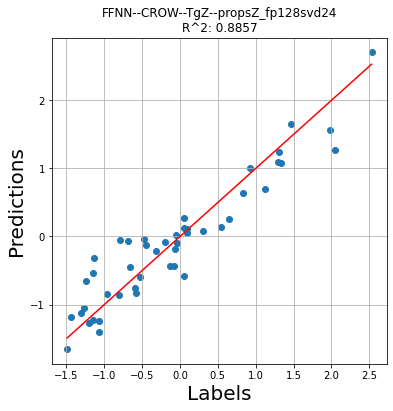

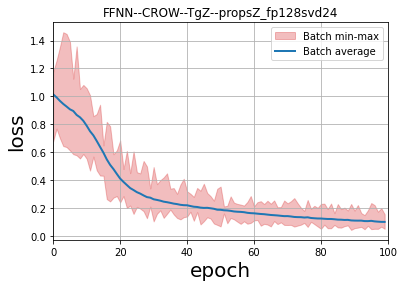

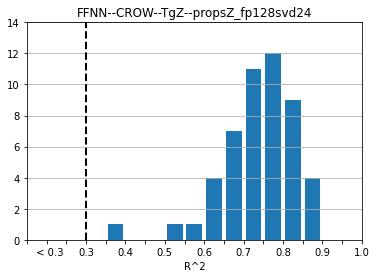

In [8]:
run_nTrials(get_FFNN(),
            X = np.hstack([crow_props_zScore, partial_svd(crow_fp_128, 24)]),
            y = crow_Tg_zScore,
            saveLoc = f'results_801/FFNN--CROW--TgZ--propsZ_fp128svd24',
            histColor='tab:blue')
None